In [87]:
!pip install ypstruct

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ypstruct import structure

*Test function*

In [89]:
def cylinder(r,h):
  pi = 3
  return sum(pi*h*(r**2))

*Problem Define*

In [90]:
problem = structure()
problem.costfunc = cylinder
problem.nvar = 5
problem.varmin = -10
problem.varmax = 10

*Parameters*

In [91]:
params = structure()
params.maxit = 100
params.npop = 25
params.pc = 2
params.gamma = 0.1
params.mutationrate = 0.2
params.sigma = 0.1

*Run*

In [92]:
def crossover(p1,p2,gamma=0.1):
  c1 = p1.deepcopy()
  c2 = p2.deepcopy()
  alpha = np.random.uniform(-gamma,1+gamma,*c1.position.shape)
  c1.position = alpha*p1.position + (1-alpha)*p2.position
  c2.position = alpha*p2.position + (1-alpha)*p1.position
  return c1,c2

In [93]:
def mutate_pos(a,mutationrate,sigma):
  new_a = a.deepcopy()
  flag = np.random.rand(*a.position.shape)  <= mutationrate
  ind = np.argwhere(flag)
  new_a.position[ind] = a.position[ind] + sigma*np.random.randn(*ind.shape)
  return new_a

In [94]:
def mutate_height(a,mutationrate,sigma):
  new_a = a.deepcopy()
  flag = np.random.rand(*a.height.shape)  <= mutationrate
  ind = np.argwhere(flag)
  new_a.height[ind] = a.height[ind] + sigma*np.random.randn(*ind.shape)
  return new_a

In [95]:
def apply_bound_pos(a,varmin,varmax):
  a.position = np.maximum(a.position, varmin)
  a.position = np.minimum(a.position, varmax)

In [96]:
def apply_bound_height(a,varmin,varmax):
  a.height = np.maximum(a.height, varmin)
  a.height = np.minimum(a.height, varmax)

In [97]:
def run(problem, params):
  costfunc = problem.costfunc
  nvar = problem.nvar
  varmin = problem.varmin
  varmax = problem.varmax

  maxit = params.maxit
  npop = params.npop
  
  pc = params.pc
  nc = int(np.round(pc*npop/2)*2)
  gamma = params.gamma
  mutationrate = params.mutationrate
  sigma = params.sigma
  #Create individual

  empty_inv = structure()
  empty_inv.position = None
  empty_inv.height = None
  empty_inv.cost = None

  #Best Sol
  bestsol = empty_inv.deepcopy()
  bestsol.cost = np.inf 

  #Initialize Population

  pop = empty_inv.repeat(npop)
  for l in range(0,npop):
    pop[l].position = np.random.uniform(varmin, varmax, nvar)
    pop[l].height = np.random.uniform(varmin, varmax, nvar)
    pop[l].cost = costfunc(pop[l].position, pop[l].height)
    if pop[l].cost < bestsol.cost:
        bestsol = pop[l].deepcopy()

  #Best cost of Iteration
  bestcost = np.empty(maxit)

  #Main part
  for it in range(maxit):
    popc = []
    for k in range(nc//2):
      q = np.random.permutation(npop)
      p1 = pop[q[0]]
      p2 = pop[q[1]]

      #Cross-Over
      c1, c2 = crossover(p1,p2,gamma)

      #Mutate
      c1 = mutate_pos(c1, mutationrate, sigma)
      c1 = mutate_height(c1, mutationrate, sigma)
      c2 = mutate_pos(c2, mutationrate, sigma)
      c2 = mutate_height(c2, mutationrate, sigma)

      #Bounds
      apply_bound_pos(c1,varmin,varmax)
      apply_bound_pos(c2,varmin,varmax)
      apply_bound_height(c1,varmin,varmax)
      apply_bound_height(c2,varmin,varmax)

      #Evaluate
      c1.cost = costfunc(c1.position, c1.height)
      if c1.cost < bestsol.cost:
        bestsol = c1.deepcopy()

      c2.cost = costfunc(c2.position, c2.height)
      if c2.cost < bestsol.cost:
        bestsol = c2.deepcopy()

      #Add
      popc.append(c1)
      popc.append(c2)

    #Merge, Sort and Select
    pop += popc
    pop = sorted(pop, key=lambda t: t.cost)
    pop = pop[0:npop]

    #Store
    bestcost[it] = bestsol.cost

    #Show Information
    print(f'Iteration {it}: Best Cost = {bestcost[it]}')

  out = structure()
  out.pop = pop
  out.bestsol = bestsol
  out.bestcost = bestcost
  return out

In [98]:
out = run(problem, params)

Iteration 0: Best Cost = -2376.736458876373
Iteration 1: Best Cost = -2671.6576719605564
Iteration 2: Best Cost = -2673.0820506684186
Iteration 3: Best Cost = -2766.5881940443614
Iteration 4: Best Cost = -2770.5029671231996
Iteration 5: Best Cost = -3085.192718845511
Iteration 6: Best Cost = -3085.192718845511
Iteration 7: Best Cost = -3412.3258384359483
Iteration 8: Best Cost = -3412.3258384359483
Iteration 9: Best Cost = -3483.4107886579623
Iteration 10: Best Cost = -3483.4107886579623
Iteration 11: Best Cost = -3553.5546086626255
Iteration 12: Best Cost = -3553.5546086626255
Iteration 13: Best Cost = -3598.7447016224123
Iteration 14: Best Cost = -3691.8617024472906
Iteration 15: Best Cost = -3762.8185222586117
Iteration 16: Best Cost = -3780.599492085235
Iteration 17: Best Cost = -3814.8667684296697
Iteration 18: Best Cost = -3851.06553996978
Iteration 19: Best Cost = -3883.3041936385825
Iteration 20: Best Cost = -3924.801896006976
Iteration 21: Best Cost = -3957.457235070235
Iterat

*Results*

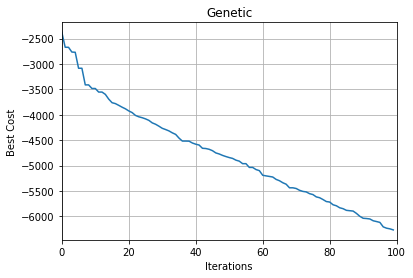

In [104]:
plt.plot(out.bestcost)
# plt.semilogy(out.bestcost)
plt.xlim(0,params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Best Cost')
plt.title('Genetic')
plt.grid(True)
plt.show()

In [100]:
# out.pop[5]

In [101]:
# for c in range(0,params.npop):
#   print(out.pop[c])